In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


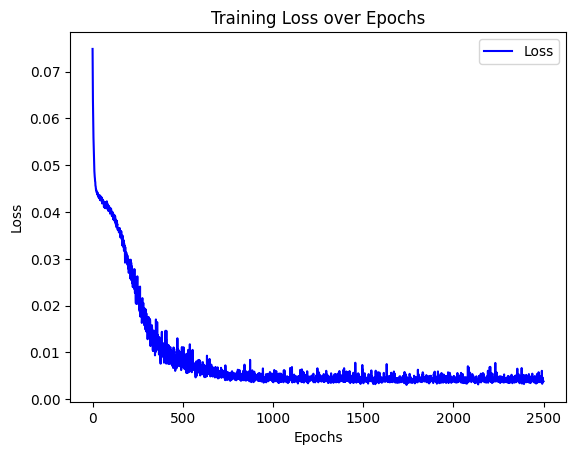

In [5]:
# Input data
X_input = torch.linspace(-1, 1, 200).reshape(-1, 1)

# Target function
y_output = (np.sin(5 * (np.pi * X_input))) / ((5 * (np.pi * X_input)))

# Model
class CustomModel(nn.Module):
    def __init__(self, input_dim=1, h2=8, h3=12, h4=8, h5=6, output_dim=1):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, h2)
        self.fc2 = nn.Linear(h2, h3)
        self.fc3 = nn.Linear(h3, h4)
        self.fc4 = nn.Linear(h4, h5)
        self.out = nn.Linear(h5, output_dim)
        # Introduce dropout regularization
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.dropout(x)  # Add dropout layer
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.out(x)
        return x

# Create the model
model = CustomModel()

# loss function
loss_function = nn.HuberLoss()

# optimizer
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001)

# learning rate scheduler
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1000, gamma=0.1)

# Training Loop
num_epochs = 2500
loss_history = []
gradient_norm_list = []

for epoch in range(num_epochs):
    # Forward pass
    predictions = model.forward(X_input)

    # Compute loss
    training_loss = loss_function(predictions, y_output)
    loss_history.append(training_loss.item())

    # Zero gradients
    optimizer.zero_grad()

    # Backward pass
    training_loss.backward()

    # Step optimizer
    optimizer.step()

    # Step the scheduler to adjust the learning rate
    scheduler.step()

    # Compute gradient norms
    total_grad_norm = 0.0
    for param in model.parameters():
        if param.grad is not None:
            total_grad_norm += (param.grad.cpu().data.numpy() ** 2).sum()
    grad_norm_value = total_grad_norm ** 0.5
    gradient_norm_list.append(grad_norm_value)

# Convert loss history to tensor for visualization
loss_history = torch.tensor(loss_history)

# Plot loss over epochs
plt.plot(range(num_epochs), loss_history.numpy(), 'b', label='Loss')
plt.title("Training Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.show()




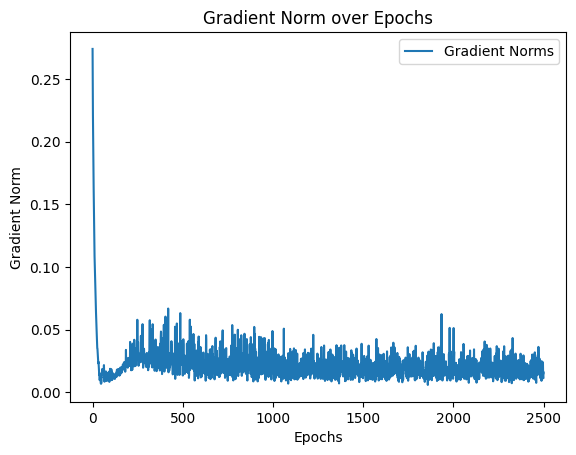

In [6]:
# Plot gradient norms over iterations
plt.plot(range(num_epochs), gradient_norm_list, label='Gradient Norms')
plt.title("Gradient Norm over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Gradient Norm")
plt.legend(loc="upper right")
plt.show()